# 4 Supervised Machine Learning: Regression 

## Content
01 Import libraries  
02 Import data   
03 Clean data  
04 Analysis  

# 01 Import libraries
Install the scikit-learn library.
Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

# 02 Import data

In [8]:
# Import insurace data
path=r'/Users/DA77/CF/Open_Data_Project/02_Data'

In [9]:
insurance=pd.read_csv(os.path.join(path,'2.02_Prepared_Data','insurance_clean.csv'),index_col=0 )

In [91]:
insurance.shape

(1338, 7)

In [93]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 03 Clean data
Clean your data so that it’s ready for analysis.

**Note**. Wrangling and cleaning already completed in Exercises 6.01-6.03. Hence, just checking if data is still as expected.

In [12]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
insurance.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [14]:
insurance.shape

(1338, 7)

# 04 Analysis 

## Task 4
Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test. Based on EDA in Exercise 6.02 it is interesting to further test the relationship between 'bmi' and healthcare charges. 

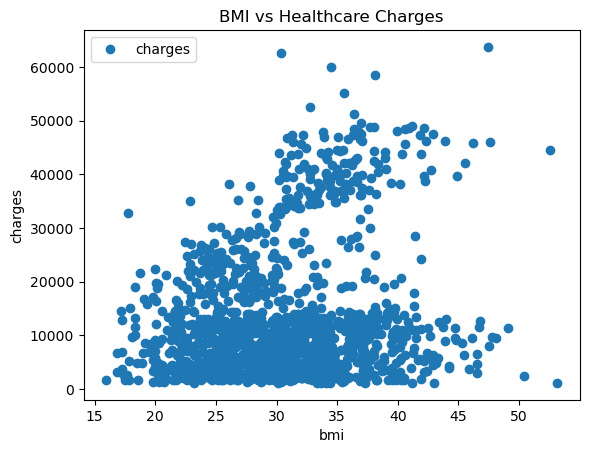

In [17]:
# Create a scatterplot using matplotlib for 'bmi' and 'charges'

insurance.plot(x = 'bmi', y='charges',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('BMI vs Healthcare Charges')  
plt.xlabel('bmi')  
plt.ylabel('charges')  
plt.show()

In [18]:
# Export
plt.savefig('scatterplot_BMI_charges.png', dpi=300, bbox_inches='tight')  # Saves as a high-quality PNG file

## Task 5 Hypothesis
State your hypothesis in a markdown cell within your Jupyter notebook.

If BMI of a patient in increased, the likelihood of their healthcare charges going up will increase too.

## Task 6. Reshape variables
Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.


In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = insurance['bmi'].values.reshape(-1,1)
y = insurance['charges'].values.reshape(-1,1)

In [42]:
X

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [44]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

## Task 7. 
Split data
Split the data into two sets: a training set and a test set.

In [49]:
# Split data into a training set and a test set following 70% train vs 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Task 8. Linear regression
Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.

In [51]:
# Regression object - to fit onto the training set 
regression = LinearRegression()

In [53]:
# Fit the regression to the train set 
regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X 
y_predicted = regression.predict(X_test)

## Task 9. Regression plot
Create a plot that shows the regression line on the test set.

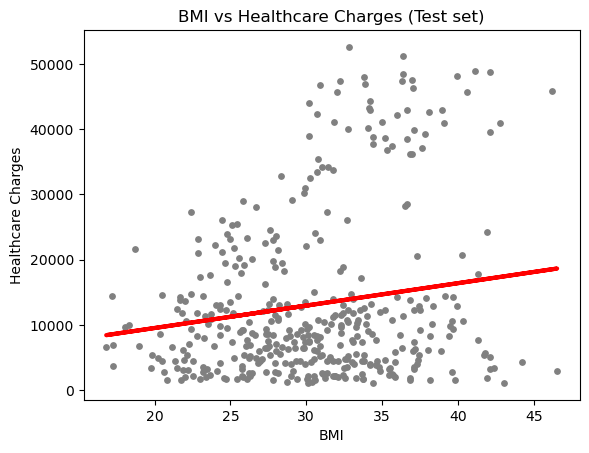

In [58]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('BMI vs Healthcare Charges (Test set)')
plot_test.xlabel('BMI')
plot_test.ylabel('Healthcare Charges')
plot_test.show()

## Task 10. Interpretation
Write your own interpretation of how well the line appears to fit the data in a markdown cell.

Visually, the line fits the data only partially: There is a good fit for charges under 20k. However, the training model cannot explain higher charges and especial with high BMI above 30. 

## Task 11. Model performance
Check the model performance statistics—MSE and R2 score.

In [61]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [63]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[343.46869991]]
Mean squared error:  151291248.54352704
R2 score:  0.05128390291175888


## Task 12. Compare y-predicted vs. y-actual
Compare the predicted y values with the actual y values in a dataframe.

In [69]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9724.53000,13043.195880
1,8547.69130,12758.116859
2,45702.02235,16603.248954
3,12950.07120,15852.769845
4,9644.25250,8870.051176
5,4500.33925,10012.084603
6,2198.18985,11708.819981
7,11436.73815,15167.549789
8,7537.16390,13046.630567
9,5425.02335,13340.296305


## Task 13. Interpretation
Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias. 

### Interpretation  

- **Positive Slope**: A 1-unit increase in BMI is associated with a 343 USD increase in healthcare charges. This suggests a positive correlation between BMI and healthcare costs.  
- **Model Performance**: The high Mean Squared Error (MSE) and low \( R^2 \) value (close to 0) indicate poor model fit—BMI alone explains only about 5% of the variance in healthcare charges. While the regression line fits well in dense data regions, it struggles in areas with greater dispersion, further confirming the model's limitations.  
- **Limitations of BMI as a Sole Predictor**: Given the weak explanatory power, BMI alone is insufficient as a predictor of healthcare costs. This aligns with observations from the earlier pair plot, which suggested the presence of confounding variables (e.g., smoking).  
- **Potential Model Improvements**: A multiple regression model incorporating additional predictors, such as smoking status (as a dummy variable), could improve predictive accuracy. Other possible factors include age, and other factors not captured in the dataset (pre-existing conditions, and income level) which may better capture the complexity of healthcare costs.  
- **Practical Implications**: Relying solely on BMI for health insurance pricing could be misleading and potentially discriminatory. Insurers should consider a more comprehensive health assessment to ensure fairer policy pricing and risk evaluation.  



### Model Performance on the Test Set  

The model’s poor performance on the test set further confirms its limitations. Given the low \( R^2 \), the model fails to generalize data, reinforcing the need for additional explanatory variables. A high test MSE suggests large prediction errors, making it unreliable for real-world applications.  


### Reflections on Data Bias  

Possible biases in the dataset could impact model fairness and accuracy. If certain demographic groups (e.g., smokers, older individuals, those with pre-existing conditions since not captured in the dataset) are over- or underrepresented, the model may produce biased predictions. Additionally, if BMI is not an accurate health measure for all populations (e.g., muscle mass variations), this could further distort results. Addressing bias through stratified sampling or fairness-aware modeling techniques would enhance model reliability.  